# Fama French

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

Data = pd.read_csv('FamaFrenchFactors.csv', index_col='Date')

FamaFrenchData=Data.copy()

In [8]:
#Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

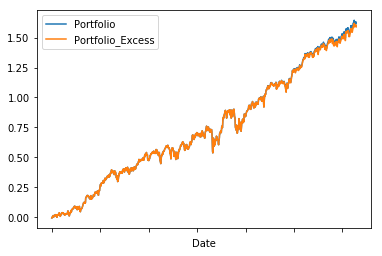

In [9]:

# Plot returns vs excess returns

CumulativeReturns = (FamaFrenchData[['Portfolio','Portfolio_Excess']]+1).cumprod()-1
CumulativeReturns.plot()

In [10]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()
covariance_matrix

,Portfolio_Excess,Market_Excess
Portfolio_Excess,0.000070,0.000057
Market_Excess,0.000057,0.000059


In [13]:
# Extract the co-variance co-efficient
covariance_coefficient =covariance_matrix.iloc[0,1]
print('Covariance coefficient:', covariance_coefficient)

Covariance coefficient: 5.726126338154974e-05


In [15]:
# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print('Benchmark variance: ', benchmark_variance)

Benchmark variance:  5.8803350882118946e-05


In [17]:
# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print('Portfolio beta: ', portfolio_beta)

Portfolio beta:  0.9737755165745473


In [19]:
#Calculating Beta Using Linear Regression
import statsmodels.formula.api as smf
model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)
fit=model.fit()
beta = fit.params['Market_Excess']
print('Portfolio beta: ', beta)

Portfolio beta:  0.9737755165745478


In [23]:
# Print adjusted r-squared of the fitted regression
rsquared = fit.rsquared
adjusted_r_squared = fit.rsquared_adj
print('Adjusted r_squared: ', adjusted_r_squared)

Adjusted r_squared 0.7942627160017837


In [26]:
#The Fama French 3-factor model
model = smf.ols(formula='Portfolio_Excess ~ Market_Excess+SMB+HML', data=FamaFrenchData)
FamaFrench_fit = model.fit()
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print('Adjusted r_squared: ', regression_adj_rsq)

Adjusted r_squared:  0.8193910088585149


In [27]:
#P_value and Statistical Significance
smb_pval=FamaFrench_fit.pvalues['SMB']
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.2621515274319265  and is  significant


In [29]:
#The efficient Market and alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print('Portfolio Alpha: ', portfolio_alpha)
portfolio_alpha_annualized = (portfolio_alpha + 1) ** 252 - 1
print(FamaFrench_fit.summary())

Portfolio Alpha:  0.00018326665203183447
                            OLS Regression Results                            
Dep. Variable:       Portfolio_Excess   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1902.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):               0.00
Time:                        01:49:33   Log-Likelihood:                 5309.4
No. Observations:                1258   AIC:                        -1.061e+04
Df Residuals:                    1254   BIC:                        -1.059e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Inter